In [3]:
import numpy as np 
import pandas as pd 


In [4]:
data = pd.read_csv(r"iris.csv")
#data
data.drop("id",axis=1,inplace=True)
data.drop_duplicates(inplace=True)
#Iris-setosa  Iris-versicolor  Iris-virginica
data["class"] = data["class"].map({"Iris-versicolor":0,"Iris-setosa":1,"Iris-virginica":2})
#只选取类别为0,1的鸢尾花数据，进行逻辑回归的二分类
data = data[data["class"]!=2]
data

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,0
96,5.7,2.9,4.2,1.3,0
97,6.2,2.9,4.3,1.3,0
98,5.1,2.5,3.0,1.1,0


In [14]:
class LogisticRegression:
    '''使用python语言来实现逻辑回归算法 '''
    def __init__(self,alpha,times):
        '''
        初始化方法 
        Parameters
        ----
        alpha:float
            学习率 
        times:int
            迭代次数 
        '''
        self.alpha = alpha
        self.times = times
    
    
    def sigmoid(self,z):
        '''
        sigmoid函数的实现
        
        
        Parameters 
        ------
        z:float
            自变量，值为z = w.T*x 
        
        Returns:
        ------
        p:float,值为[0,1]之间。
            返回样本属于类别1的概率值，用来作为结果的预测。
            当p(s) >=0.5(z>=0)时，判定为类别1，否则为类别0
        '''
        return 1.0/(1.0+np.exp(-z))
    def fit(self,X,y):
        '''根据提供的训练数据对模型进行训练。
        
        
        Parameters 
        ------
        X: 类数组类型，形状为[样本数量，特征数量]
            待训练的样本特征属性 
        y: 类数组类型 ，形状为[样本数量]
        '''
        
        X = np.asarray(X)
        y = np.asarray(y)
        #创建并初始化权重，值为0，长度是特征数量+1多一个w0
        self.w_ = np.zeros(1+X.shape[1])
        #创建损失列表，用来保存每次迭代后的损失值
        self.loss_ = []
        for i in range(self.times):
            z = np.dot(X,self.w_[1:])+self.w_[0]
            #计算概率值（结果判定为1的概率值）
            p = self.sigmoid(z)
            #根据逻辑回归的代价函数(目标函数)，计算损失值。
            #逻辑回归的代价函数(目标函数)：
            #J(w) =  -sun(yi*log(s(zi)) + (1-yi)*log(1-s(zi)))[i从1到n，n为样本的数量]
            cost = -np.sum(y*np.log(p)+(1-y)*np.log(1-p))
            self.loss_.append(cost)
            #权重值的调整 根据公式调整为：权重(j列) = 权重(j列)+学习率*sum((y-s(z))*x(j))
            self.w_[0] += self.alpha*np.sum((y-p)*1)#其中x0恒为1
            self.w_[1:]+= self.alpha*np.dot(X.T,y-p)
    def predict_proba(self,X):#预测的概率值
            '''根据参数传递的样本，对样本数据进行预测
            Parameters 
            ------
            X: 类数组类型，形状为[样本数量，特征数量]
                待测试的样本特征属性 
            Returns:
            -------
            result:数组类型 
                    预测的结果(概率值)
            '''
            X = np.asarray(X)
            z = np.dot(X,self.w_[1:])+self.w_[0]
            p = self.sigmoid(z)#被判定为1的概率值
            #q = 1-p #被判定为0的概率值
            p = p.reshape(-1,1)#变成二维结构，便于后续拼接
            
            #将两种概率进行拼接(横向)
            
            return np.concatenate([1-p,p],axis=1)
        
    def predict(self,X):
        '''根据参数传递的样本对样本数据进行预测。
            Parameters 
            ------
            X: 类数组类型，形状为[样本数量，特征数量]
                待测试的样本特征属性 
            Returns:
            -------
            result:数组类型 
                    预测的结果(属于哪一种，分类值)
        '''
        
        #返回数组中值较大的索引就OK了
        return np.argmax(self.predict_proba(X),axis=1)#横向对比，取概率大的


In [68]:
t1 = data[data["class"]==0]
t2 = data[data["class"]==1]
t1 = t1.sample(len(t1),random_state=0)
t2 = t2.sample(len(t2),random_state=0)
train_X = pd.concat([t1.iloc[:40,:-1],t2.iloc[:40,:-1]],axis=0)#按照纵向进行拼接
train_y = pd.concat([t1.iloc[:40,-1],t2.iloc[:40,-1]],axis=0)
test_X = pd.concat([t1.iloc[40:,:-1],t2.iloc[40:,:-1]],axis=0)
test_y = pd.concat([t1.iloc[40:,-1],t2.iloc[40:,-1]],axis=0)


#鸢尾花特征列都在同一数量级，可以不用标准化处理
lr = LogisticRegression(alpha=0.0005,times=300)
lr.fit(train_X,train_y)
result_proba = lr.predict_proba(test_X)
result = lr.predict(test_X)
display(result==test_y)

86    True
71    True
69    True
59    True
89    True
96    True
53    True
50    True
97    True
94    True
21    True
19    True
9     True
41    True
47    True
3     True
0     True
46    True
Name: class, dtype: bool

In [69]:
#可视化展示：
import matplotlib as mpl
from matplotlib import pyplot as plt
#默认情况下不支持中文显示，需要进行设置
#设置黑体，支持中文显示
mpl.rcParams["font.family"] = "SimHei"
#在设置中文字体时，能够正常的显示符号
mpl.rcParams["axes.unicode_minus"] = False

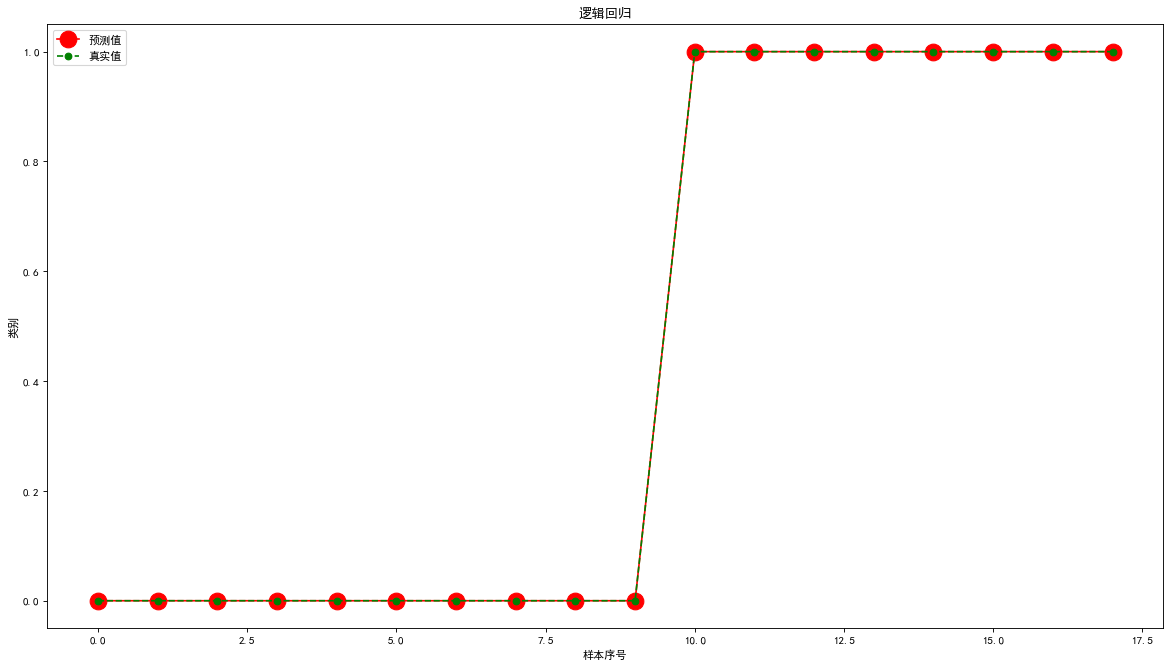

In [70]:
#绘制预测值
plt.figure(figsize=(18,10),dpi=80)
plt.plot(result,"ro-",ms=15,label="预测值")
plt.plot(test_y.values,"go--",label="真实值")
plt.title("逻辑回归")
plt.xlabel("样本序号")
plt.ylabel("类别")
plt.legend()
plt.show()

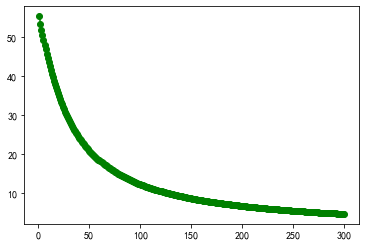

In [71]:
#绘制目标函数的损失值
plt.plot(range(1,lr.times+1),lr.loss_,"go-")